## Final Project Submission

Please fill out:
* Student name: Isobel Daley
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# King County House Price Project

## Introduction

***TO BE COMPLETED AT THE END**

## Business Requirement

## Importing Required Libraries


In [148]:
# Pandas is used for data manipulation and analysis
# Numpy is used to create multidimensional arrays, and to perform mathematical function

import pandas as pd
import numpy as np

# Matplotlib is used to create visualisations.  
# Seaborn sits on top of Matplotlib, allowing the creation of more visually appealing visualisations

import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Data

Pandas provides the functionality necessary to import data.  The data has been provided in CSV file "kc_house_data.csv".  It is available in the repository in which we are working.  

The data can therefore be imported using the pd.read_csv() function.

In [149]:
kc_data = pd.read_csv("kc_house_data.csv")

## Getting to Know the Data

Before we start working with the data, we need to understand its key characteristics.  This includes:

- The column names
- The nature of each variable (e.g. is it numerical or text, continuous or discrete)
- The presence of null values/missing data

### Column Names

For ease of reference, the column names are provided below, alongside a brief description.

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Variable Characteristics

To understand the nature of each variable, we can first use the .info() function to provide identify the type and number of each variable.

In [150]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


From the above, we can infer:
- There are 21,597 observations in total
- Three variables have missing values (waterfront, yr_renovated, view).  These will be investigated further and addressed.
- The variables are a mix of integers, floats and objects.  
- The type of certain variables may need to be changed when cleaning the data.  For example:

    - sqft_basement is an object.  This should be an integer.
    - date will need to be converted to a datetime.  
 
To investigate further, we can use the .head() command to inspect the first few rows of the dataframe.

In [151]:
## This command ensures that all columns are displayed when using the .head() command.  Without it, some are hidden from view.
pd.set_option('display.max_columns', 500)
## .head(x) displays the first x rows from a given dataframe.
kc_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


The above provides more details on certain features:
- **bathrooms** is a float, which assumes non-whole numbers.  According to the column descriptions, it is important to note that this variable gives the number of bathrooms divided by the number of bedrooms.  This is why non-whole numbers are recorded.  
- **floors**, **waterfront**, **view**, **sqft_basement**, **yr_renovated** should all be converted to int64
- **date** should be converted to a datetime

In [152]:
## describe() provides key statistics for each variable, including the mean, standard deviation and quartiles.

kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From the above, we can ascertain:

- **condition** and **grade** are likely to be categorical variables.  These will be addressed during the data cleaning phase.

### Identifying Missing Values

Next, it is necessary to identify missing values.  These will need to be addressed during the data cleaning phase.

To do this, the .isna() function can be chained to .sum().  The result will be a list of variables, alongside the number of missing values for each.

In [153]:
kc_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

As can be seen from the above, there are a significant proportion of missing values for both **waterfront** (2376 of 21597) and **yr_renovated** (3842 of 21597).  These will need to be replaced by mean, median or mode during the data cleaning phase.  Dropping these records would lead ot significant data loss.  

There are a small proportion of missing values for **view** (63 of 21597). Given that the number of records with missing values is small, it may be reasonable to drop these records.  This will be addressed in the data cleaning phase. 

## Cleaning the Data

### Dealing with Missing Values

#### yr_renovated

**yr_renovated** is a numerical variable with discrete values.  According to our previous analysis, there are 3842 missing values.  However, inspecting the mean (83.6) and 25th, 50th and 75th quartiles (all zero), it is likely that zero is being used as a placeholder for additional missing values.  To confirm this, .value_counts() is used to view the distribution of values for **yr_renovated**

In [154]:
pd.set_option('display.max_rows', 500)
kc_data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
1996.0       11
1988.0       11
1970.0        9
2011.0        9
1980.0        8
1982.0        8
2012.0        8
1979.0        7
1977.0        7
1968.0        7
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0  

The above analysis confirms that 0.0 is being used as a placeholder for missing values.  This means that there are 3842 + 17011 = 20853 missing values, out of 21597 observations.  This is equal to 97% of values.  

With this in mind, the most sensible course of action is to drop this column entirely.  If one was to replace the missing values with the mean/mode, it would be based on a very small section of the data, and would likely skew the distribution significantly.  

To drop this column, 

In [155]:
kc_data.drop('yr_renovated', axis=1, inplace=True)

**waterfront**

This is believed to be a categorical variable, taking one of two values (0 = no view to the waterfront, 1 = has a view to the waterfront).  To confirm this, the distribution of values across the two variables will be inspected.

In [156]:
kc_data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

This confirms our understanding that **waterfront** is a categorical variable.  To deal with the missing values associated with this predictor, the most appropriate course of action is to replace null values with the 0.  This is because the vast majority of properties do not have a waterfront view, it is therefore both the mode and the median.   

In [157]:
# The attribute inplace=True is used to modify the original dataframe.
kc_data['waterfront'].fillna(kc_data['waterfront'].median(), inplace=True)

In [158]:
kc_data['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

#### view

Around 0.3% of values for the variable **view** are missing.  Whilst this is a small proportion of our total dataset, it would be preferable to avoid losing data.  With this in mind, to assess the options for replacing missing data for **view**, the distribution of values for this variable can be inspected.

In [159]:
kc_data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

From the above, we can confirm that **view** is also a categorical variable.  It assumes an index value of 0 to 4 depending how good the view of the property was.  The vast majority of houses had a **view = 0**.  With this in mind, a sensible strategy for replacing missing values, is to use 0.

In [160]:
kc_data['view'].fillna(kc_data['view'].median(), inplace=True)

In [161]:
kc_data['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

#### Confirming All Missing Values Have Been Addressed

A final check confirms that all missing values have been addressed:

In [162]:
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Changing Data Types

Two variables have unexpected data types:
- **date** is an object, should be a datetime
- **sqft_basement** is an object, should be an int

Before proceeding, the type of both of these variables will be modified:

#### **date**

In [163]:
# pd.to_datetime() changes the data type to a datetime

kc_data['date'] = pd.to_datetime(kc_data['date'])

**sqft_basement**

Upon trying to convert **kc_data['sqft_basement']** to an integer using the command astype(int), and error message was produced:

    ValueError: could not convert string to float: '?'

From this, it was ascertained that '?' was being used as a placeholder value, and there was therefore additional missing data.  To understand how many missing values there were, the .value_counts() command was used:

In [164]:
kc_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
850.0        72
910.0        71
940.0        71
770.0        71
440.0        69
290.0        69
880.0        69
1200.0       69
520.0        68
350.0        68
920.0        66
630.0        66
960.0        65
730.0        65
740.0        64
430.0        64
1010.0       63
640.0        63
760.0        63
570.0        62
560.0        62
820.0        62
280.0        62
340.0        62
950.0        62
790.0        61
460.0        61
310.0        58
1060.0       58
980.0        57
830.0        56
540.0        55
810.0   

The above shows that 454 values, out of 21597 are missing values.  Given that more than half of all properties have no basement, an appropriate strategy is to replace the missing values with zero.

In [165]:
# replace values with a '?' witn NaN
kc_data['sqft_basement'].replace('?', kc_data['sqft_living']-kc_data['sqft_above'], inplace=True)
kc_data['sqft_basement'] = kc_data['sqft_basement'].astype('float')


#### Confirming Datatypes

To verify that all datatypes have been correctly addressed, the .info() function is applied again.

In [166]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11)
memory usage: 3.3 MB


### Detecting Outliers

The following rule will be used to isolate and remove outliers from this dataset:

    Any data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
 
Before mathematically identifying offending datapoints, it is first worth inspecting the data using a boxplot.


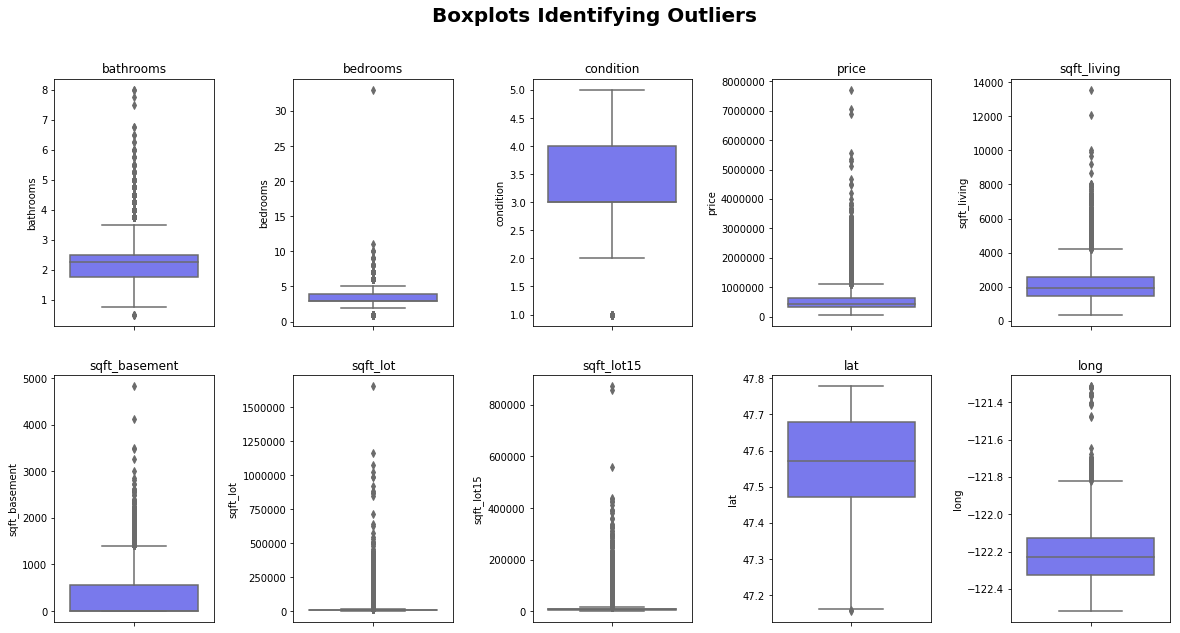

In [167]:
## First, a figure is created with 10 subplots (split into 2 rows and 5 columns).
fig, axes = plt.subplots(nrows=2, ncols=5)

## The space between each subplot is adjusted to ensure no overlap to titles, axis labels etc.
fig.subplots_adjust(hspace=0.2, wspace=0.5)

## The size of the figure is increased to 20 inches X 10 inches, to improve readability of the graphs.
fig.set_size_inches(20, 10)

## A title is given to the plot
fig.suptitle("Boxplots Identifying Outliers", fontsize=20, fontweight='bold')

## These are the variables for which boxplots will be drawn.  Dummy/categorical variables are not included, given that they can only assume a set range of values
cols = ['bathrooms', 'bedrooms', 'condition', 'price', 'sqft_living', 'sqft_basement', 'sqft_lot', 'sqft_lot15', 'lat', 'long']

## This loop adds a boxplot to for each of the variables specified
for ax, feature in zip(axes.flatten(), cols):
    sns.boxplot(kc_data[feature], orient='v', ax=ax, color="#6666ff")
    ax.set(title=feature)

As can be seen, a number of variables exhibit outliers.  Notably:

- **bathrooms** and **bedrooms** include houses with more than 7 bathrooms and up to 33 bedrooms.  These houses would clearly be unusually large.  At the other end of the spectrum, there is a house with 0 bedrooms.  This is likely to be a data entry error. 
- **price** shows that there are multiple houses valued at more than \\$1 million, and up to \\$8 million.  These are also likely to affect the performance of the model.
- **sqft_living**, **sqft_basement**, **sqft_lot** and **sqft_lot15** also exhibit many outliers, in which the size of the property far exceeds the norm.  
- **lat** and **long** are insepcted to identify any houses that fall outside/to the edges of the region under consideration.  

The outliers identified are removed, applying the interquartile rule described above.

In [168]:
## For loop iterates through specified variables, calculates the 1st quartile, 3rd quartile and interquartile range.
## Using .loc, any datapoints less than Q1 - 1.5*IQR, or greater than Q3 - 1.5*IQR are dropped

for col in cols:
        Q1 = np.quantile(kc_data[col], 0.25)
        Q3 = np.quantile(kc_data[col], 0.75)
        IQR = Q3 - Q1
        drop_col = kc_data.loc[(kc_data[col] < Q1 - 1.5*IQR) | (kc_data[col] > Q3 + 1.5*IQR)].index
        kc_data.drop(drop_col, inplace=True)       

Once the outliers have been removed, the set of boxplots is reproduced.  These boxplots illustrate the impact of removing these observations.

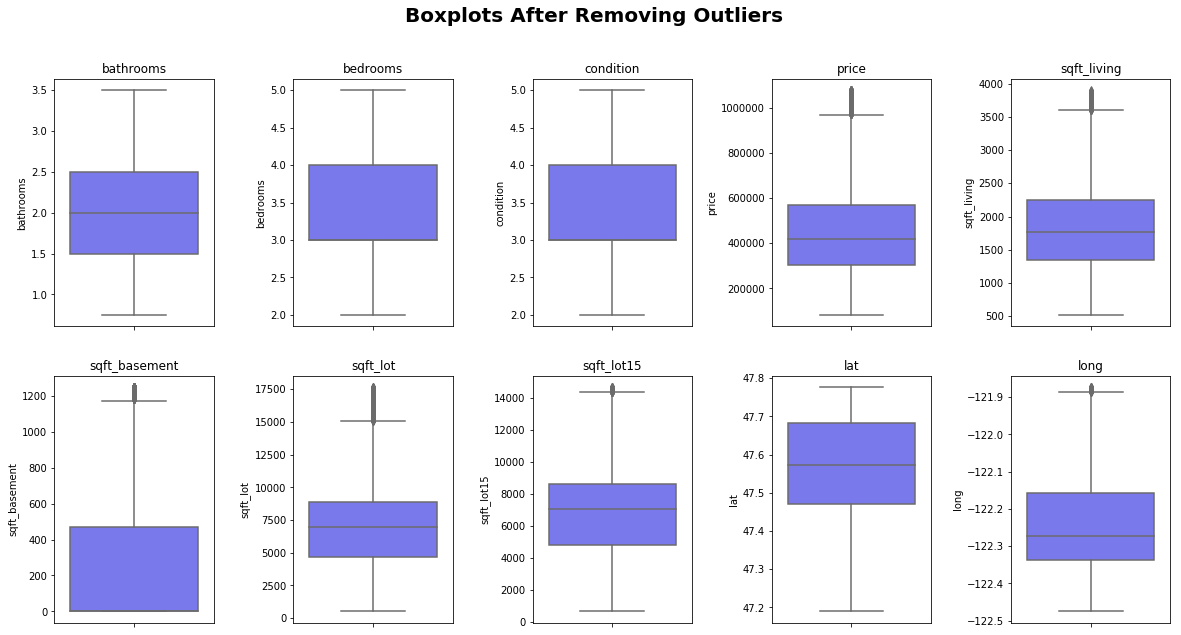

In [169]:
## This code repeats the boxplot loop detailed above

fig, axes = plt.subplots(nrows=2, ncols=5)
fig.subplots_adjust(hspace=0.2, wspace=0.5)
fig.set_size_inches(20, 10)
fig.suptitle("Boxplots After Removing Outliers", fontsize=20, fontweight='bold')

for ax, feature in zip(axes.flatten(), cols):
    sns.boxplot(kc_data[feature], orient='v', ax=ax, color="#6666ff")
    ax.set(title=feature)

The plot above demonstrates that the data now exhibits are more conventional distribution.  Note that the Q1, Q3 and the IQR will have changed.  This is because we have removed datapoints lying at the extremes.  Consequently, new outliers have been identified for some variables (e.g.**price**, **sqft_living**, **sqft_basement**, **sqft_lot**, **sqft_lot15**, **long**).  However, a common sense assessment of these outliers suggest that they do not need to be removed. 

### Categorical Variables

Categorical variables are defined as those that have two or more categories, but for which there is no intrinsic ordering to the categories.  For example, the colour of the front door of a house could be red, blue, green etc.  However, it is not possible for us to order these values (e.g. red > blue > green).  When such variables are present, a sensible strategy for handling them is to create dummy variables (a variable which assumes a value of 0 or 1, depending on whether the observation falls into the particular category).

Inspecting our list of variables, only two assume the characteristics required of a categorical variable:
- **waterfront** can assume a value of 1 (=view of the waterfront) or 0 (=no view of the waterfront)
- **zipcode** can assume one of many values depending on the zipcode area in which the house falls

It may be tempting to classify **grade**, **condition** or **view** as categorical variables.  However, these take on a category with an intrinsic ordering (e.g. a condition score of 4 is better than a condition score of 2).  

#### Waterfront

No action is requried to deal with **waterfront**.  This is because it is already a dummy variable.

#### Zipcode

There are 69 zipcode categories in our dataset:

In [170]:
## Count of the number of unique zipcodes
kc_data['zipcode'].nunique()

69

This is a large number of categories.  Our dataset would become unwieldy if we were to create dummy variables for each zipcode.  Moreover, given the presence of **lat** and **long** in our dataset, some consideration is already given to the location of the house.  

For this reason, a decision is taken to drop **zipcode** from the dataset.

In [171]:
## Drop zipcode from kc_data

kc_data.drop(['zipcode'], axis=1, inplace=True)

### Transformations

#### Scaling

The Kings County dataset contains variables which vary widely in magnitude.  For example, **bedrooms** typically assumes a value between 3 and 5.  Meanwhile, **price** can range from <\\$100,000 to >\\$1,000,000.  Whilst this does not create formal problems for a linear regression model, it can give the impression that some variables are more important than others.  Furthermore, in more complex machine learning models, scaled features is required.  For this reason, it is good practice to scale the variables under investigation in a multiple linear regression model.

For this dataset, the min-max scaling has been chosen.  This applies the following transformation:

 %%latex
    $$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$
 
This method of scaling brings all values within the range 0 and 1.

In [172]:
col = list(kc_data.drop('id', axis=1).columns.values)

for col in cols:
    kc_data[col] = (kc_data[col] - np.min(kc_data[col]))/(np.max(kc_data[col]) - np.min(kc_data[col]))

#### Log Transformations

The performance of a linear regression model is often enhanced if the distribution of the predictors are close to normal.  To improve the normality of the predictor distriution, it is possible to take logs of each variable.  In this project, we will consider this for continous variables only.

Before applying the transformation, it is first worth inspecting the distribution of each predictor.  This is best achieved using a distplot.

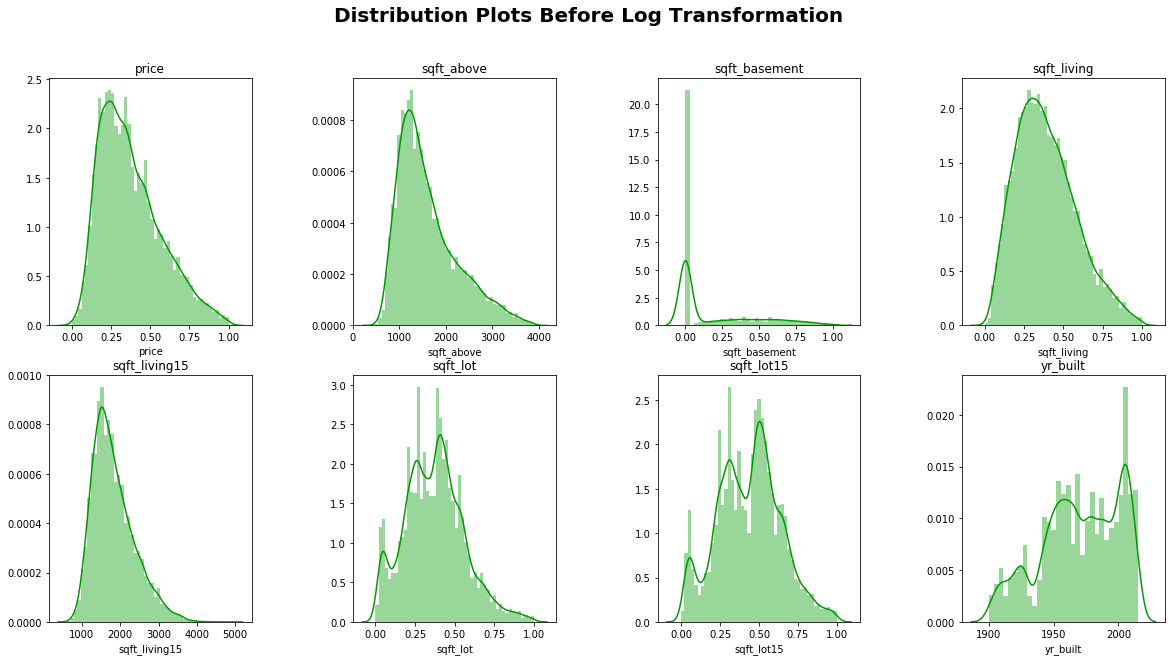

In [173]:
## Continuous variables for which log transformations will be applied.  
variable = ['price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'yr_built']

## Setup of figure, with 8 axes for displots
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.subplots_adjust(hspace=0.2, wspace=0.5)
fig.set_size_inches(20, 10)
fig.suptitle("Distribution Plots Before Log Transformation", fontsize=20, fontweight='bold')

## Creation of each distplot using for loop
for ax, var in zip(axes.flatten(), variable):
    sns.distplot(kc_data[var], ax=ax, color="#009900")
    ax.set(title=var)

The log transformation is applied.  Note that 1 is added to each variable.  This ensures that no variable assumes a zero value.  It is not possible to take a log of zero.  

In [174]:
## Apply log trasnformation to each variable

kc_data['price'] = kc_data['price'].map(lambda x: np.log(x+1))
kc_data['sqft_above'] = kc_data['sqft_above'].map(lambda x: np.log(x+1))
kc_data['sqft_basement'] = kc_data['sqft_basement'].map(lambda x: np.log(x+1))
kc_data['sqft_living'] = kc_data['sqft_living'].map(lambda x: np.log(x+1))
kc_data['sqft_living15'] = kc_data['sqft_living15'].map(lambda x: np.log(x+1))
kc_data['sqft_lot'] = kc_data['sqft_lot'].map(lambda x: np.log(x+1))
kc_data['sqft_lot15'] = kc_data['sqft_lot15'].map(lambda x: np.log(x+1))
kc_data['yr_built'] = kc_data['yr_built'].map(lambda x: np.log(x+1))


Once the log transformation has been applied, the distributions are re-inspected in order to understand its impact.

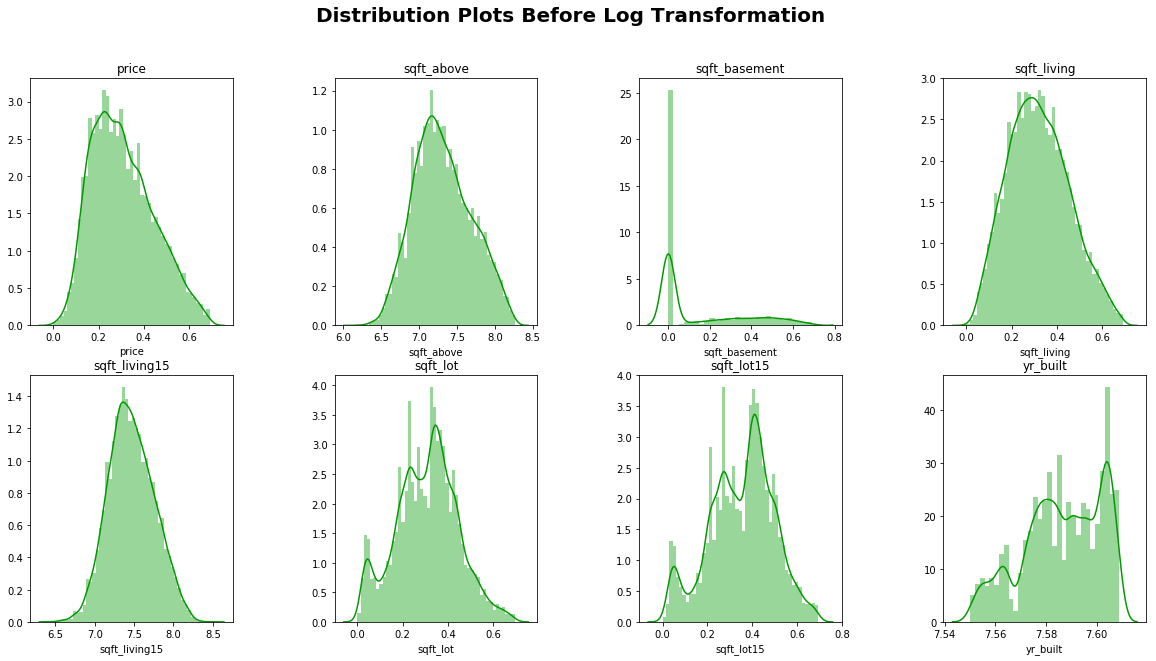

In [175]:
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.subplots_adjust(hspace=0.2, wspace=0.5)
fig.set_size_inches(20, 10)
fig.suptitle("Distribution Plots Before Log Transformation", fontsize=20, fontweight='bold')

for ax, var in zip(axes.flatten(), variable):
    sns.distplot(kc_data[var], ax=ax, color="#009900")
    ax.set(title=var)

From a visual inspection of the above, the distributions of **sqft_above**, **sqft_living** and **sqft_living15** appear to have a greater degree of normality. 

### Checking for Multicollinearity

Multicollinearity occurs where one predictor variable is significantly correlated with another predictor variable.  For example, one might expect that that the number of square feet in the living area will be significantly correlated with the total square footage of a property.

Multicollinearity can cause issues in linear regression models.  This is because the coefficient of a variable represents the change that can be expected if that variable were to change, but all others were held constant. If two variables are correlated, it is difficult to maintain the assumption that one variable can be held constant whilst the other is changed.  If violated, this can lead to huge fluctuations in coefficient estimates, despite only small changes in the model.

To mitigate this issue, one must first look for relationships between predictor variables.  The creation of an annotated heatmap, showing the Pearson correlation coefficient, provides a means of doing this.


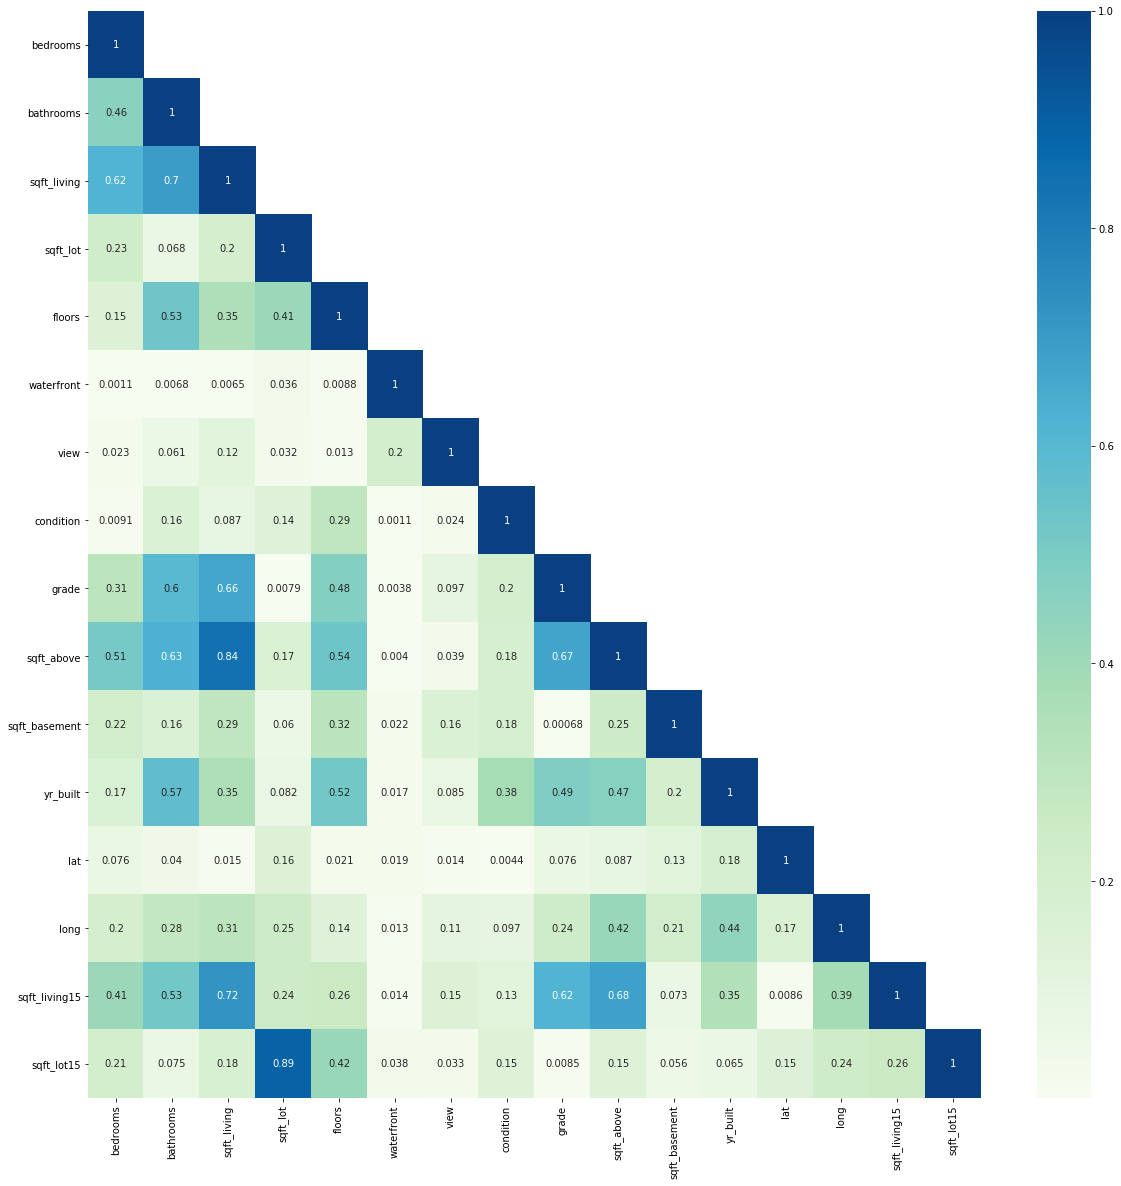

In [187]:
## Create a dataframe containing only the independent variables.  

predictors = kc_data.drop(['id', 'price'], axis=1)
plt.figure(figsize=(20,20))

## Calculate the correlation between each independent variable. 

corr = abs(predictors.corr()) 

## Create a mask to hide the upper triangle of the heatmap.  This is because it is a mirror image of the lower triangle, and therefore adds nothing.

mask = np.triu(corr, k=1)

## Plot the heatmap.

sns.heatmap(corr, annot=True, cmap="GnBu", mask=mask)


It is typical to define variables with a correlation coefficient > 0.75 as collinear.  Applying this definition, the following variables exhibit collinearity:

- sqft_living and sqft_above
- sqft_lot and sqft_lot15

To remove the collinear features, **sqft_above** and **sqft_lot15** will be dropped from the dataset.

In [188]:
## Drop sqft_above and sqft_lot15 from the dataset
kc_data.drop(['sqft_above', 'sqft_lot15'], axis=1, inplace=True)
predictors.drop(['sqft_above', 'sqft_lot15'], axis=1, inplace=True)

## Date is also dropped
predictors.drop('date', axis=1, inplace=True)

### Data Exploration

#### Visualising the Relationship between the Target Variables and Predictors

## Building a Model

### Fitting the Model

Use Feature ranking with recursive feature elimination.

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = predictors
y = kc_data['price']

## Split the data into a training set (80%) and a test set (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Use recursive feature elimination to identify which predictors to include in the model

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 11)
selector = selector.fit(X_train, y_train)

In [29]:
## Create a list indicating which regressors to include

to_include = dict(zip(X_train.columns.values, selector.support_))
to_include

{'bedrooms': True,
 'bathrooms': True,
 'sqft_living': True,
 'sqft_lot': True,
 'floors': False,
 'waterfront': True,
 'view': False,
 'condition': True,
 'grade': True,
 'sqft_basement': False,
 'yr_built': True,
 'zipcode': False,
 'lat': True,
 'long': True,
 'sqft_living15': True}

In [30]:
X_train.drop(['bedrooms', 'floors', 'sqft_basement', 'zipcode'], axis=1, inplace=True)
X_test.drop(['bedrooms', 'floors', 'sqft_basement', 'zipcode',], axis=1, inplace=True)

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
X_train

,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,lat,long,sqft_living15
5904,0.545455,0.346565,0.350962,0.0,0.333333,8,7.583756,0.453494,0.240464,7.682943
17374,0.636364,0.150764,0.036320,0.0,0.333333,7,7.603898,0.632886,0.149254,7.021976
13181,0.545455,0.373398,0.349403,0.0,0.333333,7,7.589842,0.189424,0.165837,7.484930
1371,0.818182,0.536528,0.125108,0.0,0.333333,8,7.581210,0.789832,0.220564,7.390799
5132,0.090909,0.212436,0.376948,0.0,0.333333,7,7.577634,0.876552,0.179104,7.163172
10833,0.000000,0.093156,0.349813,0.0,1.000000,6,7.554859,0.627954,0.288557,7.824446
5679,0.272727,0.163406,0.320231,0.0,0.333333,7,7.578657,0.695800,0.545605,7.293698
8821,0.636364,0.602795,0.492544,0.0,0.333333,9,7.594381,0.194015,0.223881,8.006701
1687,0.636364,0.168419,0.037779,0.0,0.333333,8,7.604894,0.819248,0.152570,7.107425
19784,0.636364,0.342372,0.286866,0.0,0.333333,7,7.603898,0.687978,0.781095,7.723562


In [31]:



## Fit the model in SKlearn

regressor = LinearRegression()
regressor.fit(X_train, y_train)

## Create an dataframe, listing the coefficient for each predictor.  This will be used to confirm that the model is 
## identifcal, regardless of whether it is in SKLearn or Statsmodels.

coefficients = {'Label': X_train.columns, 'Coefficients':regressor.coef_ }
coeff_df = pd.DataFrame(coefficients)
coeff_df

,Label,Coefficients
0,bathrooms,0.031057
1,sqft_living,0.287765
2,sqft_lot,-0.146901
3,waterfront,0.178334
4,view,0.020755
5,condition,0.047455
6,grade,0.056536
7,yr_built,-2.539010
8,lat,0.232105
9,long,0.027622


In [32]:
## Fit the model in Statsmodel (to take advantage the additional statistics provided)

import statsmodels.api as sm

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

model.summary()



/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2832.
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:07:30   Log-Likelihood:                 15457.
No. Observations:               13126   AIC:                        -3.089e+04
Df Residuals:                   13114   BIC:                        -3.080e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.4278      0.480     38.381      0.000      17.487      19.369
bathrooms         0.0311      0.004      6.918      0.000       0.022       0.040
sqft_living       0.2878      0.009     31.973      0.000       0.270       0.305
sqft_lot         -0.1469      0.006    -26.616      0.000      -0.158      -0.136
waterfront        0.1783      0.024      7.399      0.000       0.131       0.226
view              0.0208      0.001     16.166      0.000       0.018       0.023
condition         0.0475      0.003     14.277      0.000       0.041       0.054
grade             0.0565      0.001     52.440      0.000       0.054       0.059
yr_built         -2.5390      0.063    -40.026      0.000      -2.663      -2.415
lat               0.2321      0.003     80.189      0.000       0.226       0.238
long              0.0276      0.004      6.987      0.000       0.020       0.035
sqft_living15     0.0640      0.004     17.901      0.000       0.057       0.071
==============================================================================
Omnibus:                      582.138   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              853.794
Skew:                           0.417   Prob(JB):                    3.99e-186
Kurtosis:                       3.931   Cond. No.                     9.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
## To evaluate the performance of the model, calculate the house price predictions

y_pred_test = regressor.predict(X_test)

y_pred_train = regressor.predict(X_train.drop('const', axis=1))

In [34]:
print('Mean Absolute Error (TRAIN):', metrics.mean_absolute_error(y_pred_train, y_train))  
print('Mean Squared Error (TRAIN):', metrics.mean_squared_error(y_pred_train, y_train))  
print('Root Mean Squared Error (TRAIN):', np.sqrt(metrics.mean_squared_error(y_pred_train, y_train)))


Mean Absolute Error (TRAIN): 0.05753823160974957
Mean Squared Error (TRAIN): 0.005555212188576446
Root Mean Squared Error (TRAIN): 0.07453329583868169


In [35]:
## The difference between teh actual and predicted values can be compared

print('Mean Absolute Error (TEST):', metrics.mean_absolute_error(y_pred_test, y_test))  
print('Mean Squared Error (TEST):', metrics.mean_squared_error(y_pred_test, y_test))  
print('Root Mean Squared Error (TEST):', np.sqrt(metrics.mean_squared_error(y_pred_test, y_test)))

Mean Absolute Error (TEST): 0.05706575380429648
Mean Squared Error (TEST): 0.005466386107230298
Root Mean Squared Error (TEST): 0.07393501272895202


In [83]:
act_v_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
act_v_pred_25 = act_v_pred.head(25)



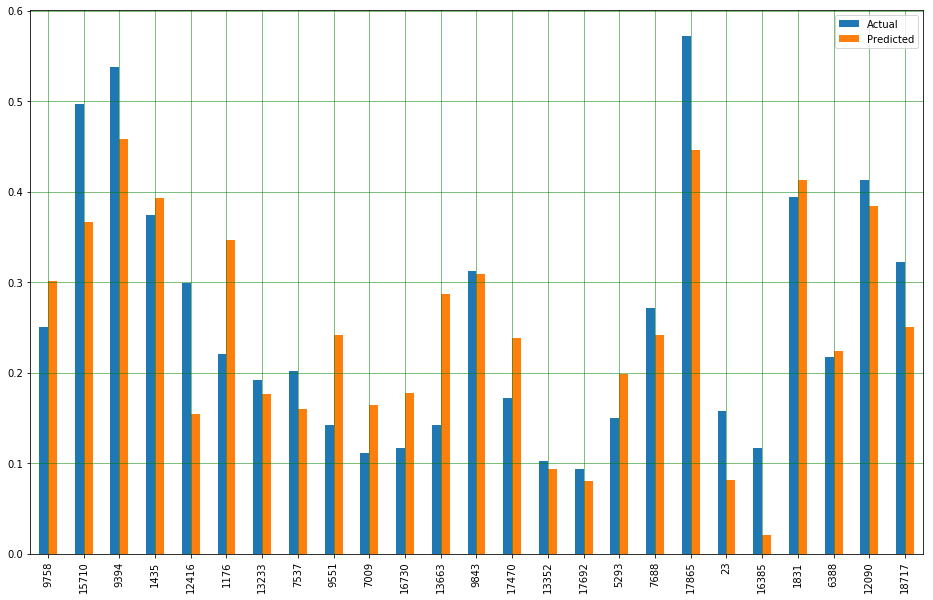

In [82]:
act_v_pred_25.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()